In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("mental_health_cleaned.csv")  # assume data is already loaded properly

In [3]:
df.drop(columns=['comments', 'timestamp'], inplace=True)
df.dropna(subset=['age'], inplace=True)
df = df[(df['age'] > 10) & (df['age'] < 100)]

In [4]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [5]:
X = df.drop(columns=['age'])
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.06277296597786075


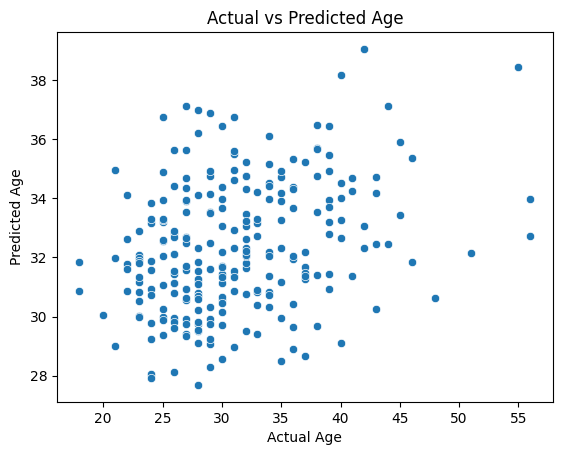

In [7]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()